<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 1</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Rodrigo Cayazaya;201773538-4</h3>
    <h3 align="center">Bernabe García;201773621-6</h3>
    <h3 align="center">Agosto de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

> <font size = "+2"><b>Antes de corregir se correrá su notebook utilizando la función Cell $\rightarrow$ Run All.</b></font>


## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 16 de septiembre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea (no es necesario adjuntar los .csv que se utilicen para trabajar). El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. Limpiando Datos (15p)

Como se mencionó en la ayudantía de laboratorio, la limpieza de datos es algo importante que se debe realizar antes de trabajar con un conjunto de datos, en esta sección trabajará con el dataset "limpieza.csv". Se espera que usted sea capaz de evidenciar las fallas dentro de este dataset y después de realizar la limpieza presente el dataset final resultante para comparar. 

>**Importante:** Si bien la limpieza es subjetiva, no optará a todo el puntaje de esta sección si presenta una limpieza incompleta (se observa que su dataset final se puede limpiar más a simple vista).

In [4]:
import csv
aux=[]
final=[]
dictAux=dict()
with open('limpieza.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        row["genero"]=row["genero"].upper()
        row["mascota"]=row["mascota"].upper()
        if (row["genero"].upper()=="HOMBRE"):
            row["genero"]="MASCULINO"
        if (row["genero"].upper()=="MUJER"):
            row["genero"]="FEMENINO"
        if ((row["genero"]=="MASCULINO" or row["genero"]=="FEMENINO") and (row["mascota"]=="PERRO" or row["mascota"]=="GATO" or row["mascota"]=="NO") and (int(row["edad"])>0)):
            aux.append(row)
    for i in aux:
        dictAux={"genero":i["genero"], "mascota":i["mascota"], "edad":i["edad"], "tipo":i["trabajo"].split("/")[0], "sueldo":i["trabajo"].split("/")[1], "e_civil":i["e_civil"]}
        final.append(dictAux)
    for i in final:
        print (i)
        
            


{'genero': 'MASCULINO', 'mascota': 'GATO', 'edad': '44', 'tipo': 'dependiente', 'sueldo': '$500000', 'e_civil': 'viud@'}
{'genero': 'MASCULINO', 'mascota': 'NO', 'edad': '70', 'tipo': 'dependiente', 'sueldo': '$100000', 'e_civil': 'casad@'}
{'genero': 'FEMENINO', 'mascota': 'NO', 'edad': '54', 'tipo': 'dependiente', 'sueldo': '$500000', 'e_civil': 'solter@'}
{'genero': 'MASCULINO', 'mascota': 'PERRO', 'edad': '47', 'tipo': 'independiente', 'sueldo': '$200000', 'e_civil': 'separad@'}
{'genero': 'FEMENINO', 'mascota': 'GATO', 'edad': '33', 'tipo': 'dependiente', 'sueldo': '$500000', 'e_civil': 'casad@'}
{'genero': 'MASCULINO', 'mascota': 'PERRO', 'edad': '64', 'tipo': 'independiente', 'sueldo': '$200000', 'e_civil': 'casad@'}
{'genero': 'MASCULINO', 'mascota': 'PERRO', 'edad': '18', 'tipo': 'dependiente', 'sueldo': '$500000', 'e_civil': 'viud@'}
{'genero': 'FEMENINO', 'mascota': 'GATO', 'edad': '67', 'tipo': 'independiente', 'sueldo': '$500000', 'e_civil': 'viud@'}
{'genero': 'MASCULINO'

## 2. Apps en la Playstore (35p)

Google Play Store actualmente posee una enorme cantidad de aplicaciones que pueden ser descargadas por los usuarios. En esta sección utilizará una pequeña parte de dicho universo y trabajará principalmente en análisis exploratorio de los datos para responder las preguntas que verá a continuación. 

El archivo a utilizar es "googleplaystore.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/lava18/google-play-store-apps)

>PD: Hay 1 fila mala en el dataset, no es difícil de identificar.

>a) ¿Es posible observar alguna concentración de ratings de las aplicaciones en torno a un intervalo? Si su respuesta es sí, ¿Qué rango/s tiene/n mayor concentración?

In [5]:
import csv
import math
import numpy as np # importando numpy
import pandas as pd # importando pandas
file = open('googleplaystore.csv', encoding="utf8")
rating=[]
reader = csv.DictReader(file)
for row in reader:
    if(row["Rating"]!="NaN" and row["Rating"]!="19"):
        rating.append(float(row["Rating"]))
file.close()
rating.sort()
max_=max(rating)
min_=min(rating)
rango=max_-min_
mediana=np.median(rating)
k=math.log2(len(rating))+1
amplitud=rango/k
i=1
frecuencias=[]
while (i*amplitud+1<=max_):
    frecuencias.append(0)
    for valor in rating:
        if (((i-1)*amplitud+min_<=float(valor)<=i*amplitud+min_) and (i==1)):
            frecuencias[i-1]=frecuencias[i-1]+1
        elif((i-1)*amplitud+min_<float(valor)<=i*amplitud+min_):
            frecuencias[i-1]=frecuencias[i-1]+1
    i+=1
print(frecuencias)
print("La Mayor concentracion de rating esta dado por el intevalo [",frecuencias.index(max(frecuencias))*amplitud-amplitud+1,";",frecuencias.index(max(frecuencias))*amplitud+1,"]")







[17, 6, 20, 33, 53, 46, 112, 216, 393, 716, 1662, 2028, 2970, 820]
La Mayor concentracion de rating esta dado por el intevalo [ 4.100072309160747 ; 4.381897064538997 ]


>b) ¿Qué grupo tiene ratings más dispersos, las aplicaciones que pertenecen a la categoría de "EDUCATION" o las que pertenecen a la categoría de "MEDICAL"? Utilice al menos 1 recurso visual y 1 medida de tendencia para responder. 

La desviacion tipica de la Education es:  0.251079666559077
La desviacion tipica de la Medical es:  0.6626327206295956
Por lo tanto la dispersion mayor de datos es de Medical lo podemos ver graficamente en lo siguiente.


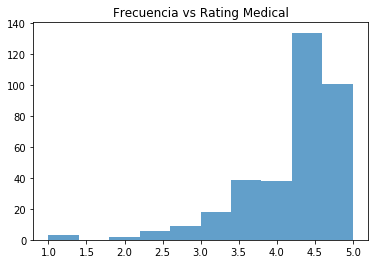

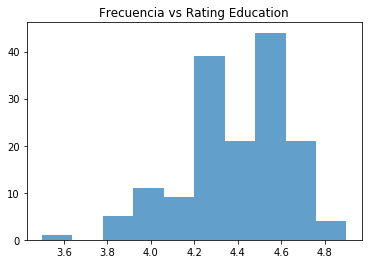

Con los graficos observamos que a pesar que la cantidad de datos sea mayor en Medical, su dispersion de datos es mayor
Ya que estan mas separados dentro de lo grafico, en cambio para Education estan cercanos entre ellos, teniendo en
cuenta que el rango de Education es menor. Para Medical el rango es: 4.0 y para Education: 1.4000000000000004
ademas de sus amplitudes Medical: 0.42322618262036793 ,Education: 0.16916130442744473


In [8]:
import csv
import math
import matplotlib.pyplot as plt # importando matplotlib

file = open('googleplaystore.csv', encoding="utf8")
education=[]
medical=[]
reader = csv.DictReader(file)
for row in reader:
    if(row["Category"]=="MEDICAL" and row["Rating"]!="NaN" and row["Rating"]!="19"):
        medical.append(float(row["Rating"]))
    elif(row["Category"]=="EDUCATION" and row["Rating"]!="NaN" and row["Rating"]!="19"):
        education.append(float(row["Rating"]))
file.close()
rangoMedical=max(medical)-min(medical) #Rango de las categorias
rangoEducation=max(education)-min(education)
kMedical=math.log2(len(medical))+1 #K de las categorias
kEducation=math.log2(len(education))+1
amplitudMedical=rangoMedical/kMedical
amplitudEducation=rangoEducation/kEducation
print("La desviacion tipica de la Education es: ", np.std(education))
print("La desviacion tipica de la Medical es: ", np.std(medical))
print("Por lo tanto la dispersion mayor de datos es de Medical lo podemos ver graficamente en lo siguiente.")
plt.title("Frecuencia vs Rating Medical")
plt.figure(1)
graficoMedical= plt.hist(medical, histtype="stepfilled", alpha=.7)
plt.figure(2)
plt.title("Frecuencia vs Rating Education")
graficoEducation= plt.hist(education, histtype="stepfilled", alpha=.7)
plt.show()
print("Con los graficos observamos que a pesar que la cantidad de datos sea mayor en Medical, su dispersion de datos es mayor")
print("Ya que estan mas separados dentro de lo grafico, en cambio para Education estan cercanos entre ellos, teniendo en")
print("cuenta que el rango de Education es menor. Para Medical el rango es:", rangoMedical, "y para Education:", rangoEducation)
print("ademas de sus amplitudes Medical:", amplitudMedical, ",Education:", amplitudEducation)




>c) Construya un boxplot sobre la cantidad de instalaciones de las aplicaciones cuyo rating sea menor a 4 y otro para las aplicacions cuyo rating sea mayor o igual a 4, compare lo que observa. 

**Hint:** Podría aplicar algún cambio de escala a los valores. ¿Cuál? No log sé. 

Dado el grafico se observa que 
Q2 sobre 4 en Rating=  6.0
Q3 bajo 4 en Rating=  6.0
Lo cual nos indica que el 50% de las apps sobre 4 en rating tienen mas de 10 millones de descargas, sin embargo
solo el 25% de apps bajo 4 logra lo mismo
Tambien observando el grafico vemos que las apps sobre 4 en rating son mas dispersas que las bajo 4
Ademas se tiene en cuenta que el rango sobre 4 es mayor que el de bajo 4 en rating
Q1 sobre 4 en Rating=  4.0
Q3 sobre 4 en Rating=  7.0
Q1 bajo 4 en Rating=  3.6989700043360187
Q2 sobre 4 en Rating=  4.698970004336019


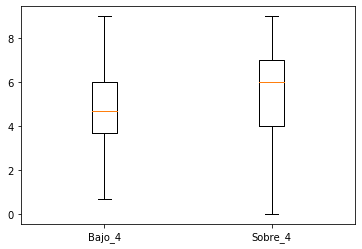

In [9]:
file = open('googleplaystore.csv', encoding="utf8")
sobre4=[]
bajo4=[]
reader = csv.DictReader(file)
for row in reader:
    if(float(row["Rating"])<4 and row["Rating"]!="NaN" and row["Rating"]!="19"):
        bajo4.append(math.log10(int(row["Installs"].split("+")[0].replace(",",""))))
    elif(float(row["Rating"])>=4 and row["Rating"]!="NaN" and row["Rating"]!="19"):
        sobre4.append(math.log10(int(row["Installs"].split("+")[0].replace(",",""))))
file.close()
plt.boxplot(x=[bajo4, sobre4], labels=["Bajo_4", "Sobre_4"])
Q2b4=np.median(bajo4)
Q2s4=np.median(sobre4)
bajo4.sort()
sobre4.sort()
Q1s4=(sobre4[1842]+sobre4[1843])/2
Q1b4=bajo4[500]
Q3s4=(sobre4[5526]+sobre4[5527])/2
Q3b4=bajo4[1500]
print("Dado el grafico se observa que ")
print("Q2 sobre 4 en Rating= ",Q2s4)
print("Q3 bajo 4 en Rating= ",Q3b4)
print("Lo cual nos indica que el 50% de las apps sobre 4 en rating tienen mas de 10 millones de descargas, sin embargo")
print("solo el 25% de apps bajo 4 logra lo mismo")
print("Tambien observando el grafico vemos que las apps sobre 4 en rating son mas dispersas que las bajo 4")
print("Ademas se tiene en cuenta que el rango sobre 4 es mayor que el de bajo 4 en rating")
print("Q1 sobre 4 en Rating= ",Q1s4)
print("Q3 sobre 4 en Rating= ",Q3s4)
print("Q1 bajo 4 en Rating= ",Q1b4)
print("Q2 sobre 4 en Rating= ",Q2b4)

>d) Para cada categoría obtenga el rango, la deviación estándar, varianza del rating y la cantidad de aplicaciones pertenecientes a dicha categoría y responda:

* De las aplicaciones de mayor rango (fíjelo usted) ¿Cuáles presentan mayor y menor variabilidad?
* ¿Cuál es la principal diferencia entre las aplicaciones cuyo rango es inferior a 2.5 y las cuyo rango es mayor a dicho valor? (Si usted no nota una diferencia significativa es una respuesta válida, siempre y cuando esté fundamentada)
* ¿Es posible concluir que las categorías con una mayor cantidad de aplicaciones presentan una mayor variabilidad de rating que aquellas con menos aplicaciones? 

Los rangos mayores seran, los mayores o iguales a 3.5
Solo se mostraran 3 en variabilidad de datos
Los menos variables y sobre 3.5 son:
GAME
COMMUNICATION
PRODUCTIVITY
Los mas variables sobre 3.5 son:
MEDICAL
FINANCE
DATING

En el Diagrama de Caja de la Desviacion Estandar (Rango)
Observamos en el diagrama de caja que las desviaciones estandar que tienen un rango sobre 2.5 son mucho mas dispersas
y mayores que las que tienen un rango menor a 2.5. Tambien se observa que mas del 75% de los datos que tienen
un rango sobre 2.5 tienen una mayor desviacion que las de rango menor
Teniendo en cuenta que llamaremos muchas apps a un categorias sobre 300, se obtendra lo siguiente
Un Diagrama de Caja de la Desviacion Estandar (Cantidad)
El cual no muestra gran diferencia, sin embargo se observa que la variabilidad de las desviaciones estandar de los
rating en si es mas variable en apps con menos de 300 apps que con mas de 300 apps, ademas se ve que, en realidad si, 
la variabilidad de los rating d

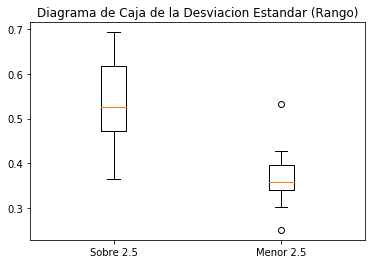

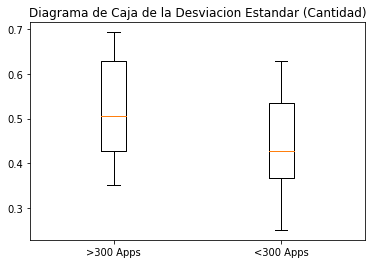

In [10]:
file = open('googleplaystore.csv', encoding="utf8")
reader = csv.DictReader(file)
categorias=dict()
for row in reader:
    if(row["Category"] in categorias.keys()):
        if(row["Rating"]!="NaN" and row["Rating"]!="19"):
            categorias[row["Category"]].append(float(row["Rating"]))
    else:
        if(row["Rating"]!="NaN" and row["Rating"]!="19"):
            categorias[row["Category"]]=[float(row["Rating"])]
    
file.close()
rangos=dict()
dS=dict()
varianza=dict()
cantidad=dict()
for key in categorias.keys():
    rangos[key]=max(categorias[key])-min(categorias[key])
    dS[key]=np.std(categorias[key])
    varianza[key]=np.var(categorias[key]) 
    cantidad[key]=len(categorias[key])
print("Los rangos mayores seran, los mayores o iguales a 3.5")
masVariables=dict()
mayores=[]
for i in rangos.keys():
    if (rangos[i] > 3.5):
        masVariables[dS[i]]=i
        mayores.append(dS[i])
mayores.sort()
print("Solo se mostraran 3 en variabilidad de datos")
print("Los menos variables y sobre 3.5 son:")
i=0
while i < 3:
    print(masVariables[mayores[i]])
    i+=1
i=1
print("Los mas variables sobre 3.5 son:")
while i <= 3:
    print(masVariables[mayores[-i]])
    i+=1
#Diferenciables...
print()
mayor=[]
menor=[]
for i in rangos.keys():
    if (rangos[i] > 2.5):
        mayor.append(dS[i])
    else:
        menor.append(dS[i])
print("En el Diagrama de Caja de la Desviacion Estandar (Rango)")
print("Observamos en el diagrama de caja que las desviaciones estandar que tienen un rango sobre 2.5 son mucho mas dispersas")
print("y mayores que las que tienen un rango menor a 2.5. Tambien se observa que mas del 75% de los datos que tienen")
print("un rango sobre 2.5 tienen una mayor desviacion que las de rango menor")
plt.figure(1)
plt.title("Diagrama de Caja de la Desviacion Estandar (Rango)")
plt.boxplot(x=[mayor, menor], labels=["Sobre 2.5", "Menor 2.5"])

mayor=[]
menor=[]
for i in cantidad.keys():
    if (cantidad[i] > 300):
        mayor.append(dS[i])
    else:
        menor.append(dS[i])
print("Teniendo en cuenta que llamaremos muchas apps a un categorias sobre 300, se obtendra lo siguiente")
print("Un Diagrama de Caja de la Desviacion Estandar (Cantidad)")
print("El cual no muestra gran diferencia, sin embargo se observa que la variabilidad de las desviaciones estandar de los")
print("rating en si es mas variable en apps con menos de 300 apps que con mas de 300 apps, ademas se ve que, en realidad si, ")
print("la variabilidad de los rating de las apps con mas de 300 apps es mayor en un 25% respecto a las que tienen menos de 300 apps")
print("Osea que si mientras mayor sea la cantidad de apps en una categoria mayor sera la variabilidad de los rating")
plt.figure(2)
plt.title("Diagrama de Caja de la Desviacion Estandar (Cantidad)")
plt.boxplot(x=[mayor, menor], labels=[">300 Apps", "<300 Apps"])

plt.show()


>e) Responda las siguientes preguntas: 

* Si mi aplicación pesa mucho ¿es probable que sea mal calificada?
* Si mi aplicación tiene una mayor cantidad de instalaciones ¿su rating será más alto?
* Si mi app está enfocada en alguna categoría en especial ¿tendrá una mayor cantidad de instalaciones?
* ¿Existe alguna categoría donde se aprecien más aplicaciones pagas que gratuitas?

Fundamente su respuesta utilizando herramientas visuales o estadísticas. 

Se tomara como apps pesadas sobre 10[MB] osea los logaritmos 10 mayor a 7
Con lo mostrado en el grafico observamos que en realidad no depende directamente del peso de las apps,
Ya que la moda sigue siendo sobre 4 y su promedio es 4.202702099151407 Y se tiene en consideracion que sobre 4
es un buen rating, ademas de saber la mediana la cual es 4.3 Tambien si comparamos los dos graficos
Grafico de bajo peso y alto observamos que los graficos se parece por lo cual no es concluible lo dicho en la pregunta.


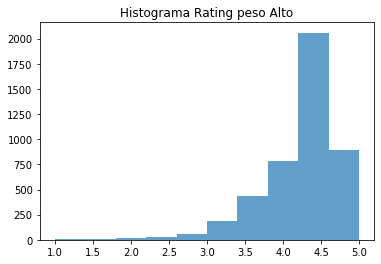

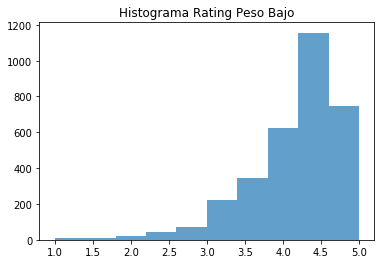

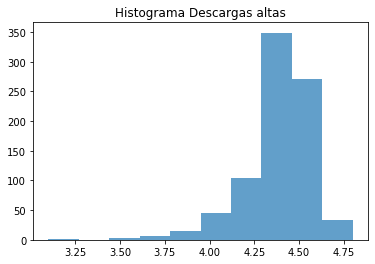

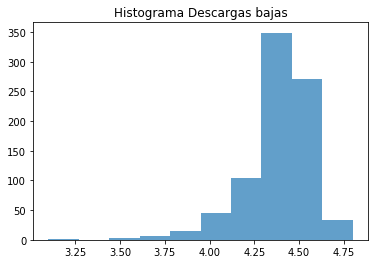

In [60]:
file = open('googleplaystore.csv', encoding="utf8")
reader = csv.DictReader(file)
tamaños=[]
rating=[]
ratingBajo=[]
for row in reader:
    if(row["Size"]!="Varies with device"):
        if("M" in row["Size"] and row["Rating"]!="NaN" and row["Rating"]!="19"):
            if(math.log10(float(row["Size"].split("M")[0])*1000000)>7):
                rating.append(float(row["Rating"]))
            else:
                ratingBajo.append(float(row["Rating"]))
        elif("k" in row["Size"] and row["Rating"]!="NaN" and row["Rating"]!="19"):
            ratingBajo.append(float(row["Rating"]))
file.close()
print("Se tomara como apps pesadas sobre 10[MB] osea los logaritmos 10 mayor a 7")
plt.figure(1)
plt.title("Histograma Rating peso Alto")
grafico= plt.hist(rating, histtype="stepfilled", alpha=.7)
plt.figure(2)
plt.title("Histograma Rating Peso Bajo")
grafico= plt.hist(ratingBajo, histtype="stepfilled", alpha=.7)
print("Con lo mostrado en el grafico observamos que en realidad no depende directamente del peso de las apps,")
print("Ya que la moda sigue siendo sobre 4 y su promedio es", np.mean(rating), "Y se tiene en consideracion que sobre 4")
print("es un buen rating, ademas de saber la mediana la cual es", np.median(rating), "Tambien si comparamos los dos graficos")
print("Grafico de bajo peso y alto observamos que los graficos se parece por lo cual no es concluible lo dicho en la pregunta.")


file = open('googleplaystore.csv', encoding="utf8")
reader = csv.DictReader(file)
ratingInstall=[]
ratingBajoInstall=[]
for row in reader:
    if(row["Rating"]!="NaN" and row["Rating"]!="19" and row["Installs"]!="0+" and row["Installs"]!="0" and row["Installs"]!= "Free" and math.log10(int(row["Installs"].split("+")[0].replace(",","")))>7):
        ratingInstall.append(float(row["Rating"]))
    elif(row["Rating"]!="NaN" and row["Rating"]!="19" and row["Installs"]!="0+" and row["Installs"]!="0" and row["Installs"]!= "Free" and math.log10(int(row["Installs"].split("+")[0].replace(",","")))<7):
        ratingBajoInstall.append(float(row["Rating"]))
file.close()
plt.figure(3)
plt.title("Histograma Descargas altas")
grafico= plt.hist(ratingInstall, histtype="stepfilled", alpha=.7)
plt.figure(4)
plt.title("Histograma Descargas bajas")
grafico= plt.hist(ratingInstall, histtype="stepfilled", alpha=.7)


In [111]:
file = open('googleplaystore.csv', encoding="utf8")
reader = csv.DictReader(file)
ratingInstall=[]
ratingBajoInstall=[]
categorias=dict()
categoriasBajas=dict()
for row in reader:
    if(row["Category"] in categorias.keys()):
        if(row["Rating"]!="NaN" and row["Rating"]!="19" and row["Installs"]!="0+" and row["Installs"]!="0" and row["Installs"]!= "Free" and row["Category"] in categorias.keys()):
            categorias[row["Category"]].append(math.log10(int(row["Installs"].split("+")[0].replace(",",""))))
    else:
        if(row["Rating"]!="NaN" and row["Rating"]!="19" and row["Installs"]!="0+" and row["Installs"]!="0" and row["Installs"]!= "Free"):
            categorias[row["Category"]]=[math.log10(int(row["Installs"].split("+")[0].replace(",","")))]
i=1
aux=[]
categoriasAux=dict()
for categoria in categorias.keys():
    categoriasAux[np.mean(categorias[categoria])]=categoria
    aux.append(np.mean(categorias[categoria]))
aux.sort()
print("Las Categorias que tienen un alto nivel de descargas son las siguientes:")
while i <= 3:
    print(i,".", categoriasAux[aux[-i]], "Con un Promedio de:", int(pow(10,aux[-i])), "Descargas") 
    i+=1

149
0
Las Categorias que tienen un alto nivel de descargas son las siguientes:
1 . ENTERTAINMENT Con un Promedio de: 3230050 Descargas
2 . GAME Con un Promedio de: 1465710 Descargas
3 . PHOTOGRAPHY Con un Promedio de: 1443229 Descargas


In [86]:
file = open('googleplaystore.csv', encoding="utf8")
reader = csv.DictReader(file)
categoriasPagas=dict()
categoriasFree=dict()
for row in reader:
    if(row["Category"] in categorias.keys()):
        if(row["Type"]=="Free"):
            categorias
        #elif (row["Type"]=="Paid")
                    

NameError: name 'csv' is not defined

>f) Construya un histograma de los tamaños de las aplicaciones ¿Se aprecia algún tipo de sesgo en la distribución?.

In [3]:
file = open('googleplaystore.csv', encoding="utf8")
reader = csv.DictReader(file)
tamaños=[]

print("En el histograma se aprecia un sesgo hacia la derecha, es decir, negativo.")
for row in reader:
    if(row["Size"]!="Varies with device"):
        if("M" in row["Size"] and row["Rating"]!="NaN" and row["Rating"]!="19"):
            tamaños.append(math.log10(float(row["Size"].split("M")[0])*1000000))
        elif("k" in row["Size"] and row["Rating"]!="NaN" and row["Rating"]!="19"):
            tamaños.append(math.log10(float(row["Size"].split("k")[0])*1000))
file.close()
print(tamaños) #Se usa logaritmo de base 10 para usar una escala mas pequeña y acotada
plt.figure(1)
plt.title("Tamaños de aplicaciones")
grafico= plt.hist(tamaños, histtype="stepfilled", alpha=.7)



NameError: name 'csv' is not defined

>g) Haga un histograma para los ratings de cada categoría. ¿Observa algún patrón respecto al sesgo de los histogramas obtenidos?

In [87]:
i=1
for categoria in categorias.keys():
    plt.figure(i)
    titulo=" ".join(["Histograma", "de", categoria])
    plt.title(titulo)
    grafico= plt.hist(categorias[categoria], histtype="stepfilled", alpha=.7)
    i=i+1

NameError: name 'categorias' is not defined

>h) Construya un heatmap (debe investigarlo por su cuenta) de las aplicaciones pagas donde la dimensión de color sea el rating y los ejes sean el precio y el tamaño de la aplicación. Concluya respecto a lo observado.

## 3. Aproximando el perímetro de una circunferencia (20p)

De sus cursos de matemática seguro habrá escuchado acerca de las coordenas polares, un cambio de coordenadas donde representamos los puntos en función de un radio y un ángulo. 

$$
x = r\cdot cos(\theta)
$$

$$
y = r\cdot sin(\theta)
$$

Utilizando estas coordenadas, usted posicionará $n$ puntos aleatorios dentro de la circunferencia lo que generará un polígono irregular, para cada $n \in [4,\infty]$ elegido debe simular una cantidad suficiente de polígonos (800-1000) que utilizará para aproximar el perímetro de la circunferencia, luego calculará el perímetro promedio y la desviación estándar para cada $n$ utilizado.


Una vez haya simulado con varios $n$ distintos grafique el perímetro promedio junto a su margen de error $\bar{x} \pm \sigma$ y el perímetro real de la circunferencia. Utilice la cantidad de lados del polígono como el eje X de su gráfico.

> El gráfico involucra 4 lineas: promedio del perímetro, perímetro real, límite superior del error y límite inferior del error.

Recuerde explicar cómo utilizará el método de los polígonos para aproximar el perímetro de la circunferencia y concluya a partir de lo que observa en el gráfico.

Algunos ejemplos de $n = 5$

<table style="width:100%">
  <tr>
    <th align="right"><img src="img/ej1.png" style="float:left;height:120px"></th>
    <th align="center"><img src="img/ej2.png" style="float:left;height:120px"></th> 
    <th align="left"><img src="img/ej3.png" style="float:right;height:120px"></th>
  </tr>
    
Para facilitar la construcción del polígono se sugiere generar los $n$ puntos y luego conectarlos en sentido antihorario/horario.

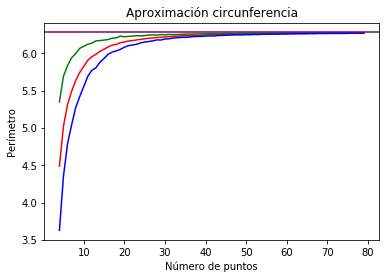

Wall time: 11 s


In [15]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import random
import math

print("El método de polígonos para aproximar perímetro coloca puntos aleatorios en una circunferencia")
print("A estos puntos se le calcula la distancia, por lo que mientras más cerca se encuentre un punto de otro, más se aproxima a la figura")
print("Es por esto que hay que poner una cantidad grande de puntos para que cada uno de ellos se encuentre cerca de otro")
print("Al tener infinitos puntos se estara dibujando un círculo pero sin lineas, solo con puntos.")

print("Del gráfico se puede concluir que mientras más puntos, más se acerca al perímetro de la circunferencia.")

def distancias(puntos):
    #Esta es la función para calcular las distancias entre los puntos que se usaran para
    #aproximar el perímetro, la distancia está en funcion del ángulo.
    puntos.sort()
    suma = 0
    for indice in range(len(puntos)):
        if indice == len(puntos)-1:
            delta_x = math.cos(puntos[indice])-math.cos(puntos[0])
            delta_y = math.sin(puntos[indice])-math.sin(puntos[0])
            suma += math.sqrt(delta_x**2 + delta_y**2)
        else:
            delta_x = math.cos(puntos[indice])-math.cos(puntos[indice +1])
            delta_y = math.sin(puntos[indice])-math.sin(puntos[indice+1])
            suma += math.sqrt(delta_x**2 + delta_y**2)
    return suma
            
    

random.seed(1)
lista_media = []
lista_desv = []
lista_n = range(4,80)
for n in lista_n:
    perimetro = []
    for m in range(0,800):
        lista_ang = np.random.uniform(0,2*math.pi,n)
        perimetro.append(distancias(lista_ang))
    media = np.mean(perimetro)
    desviacion = np.std(perimetro)
    lista_media.append(media)
    lista_desv.append(desviacion)
    
lista_mediamas = []
lista_mediamenos = []
for k in range(0,len(lista_media)):
    lista_mediamas.append(lista_media[k] + lista_desv[k])
    lista_mediamenos.append(lista_media[k] - lista_desv[k])
    
    
#plot(x,y) = grafico de linea
plt.plot(lista_n,lista_media,color="red") #perimetro media
plt.plot(lista_n,lista_mediamas,color="green") #perimetro mediamas
plt.plot(lista_n,lista_mediamenos,color="blue") #perimetro mediamenos
plt.axhline(y=2*math.pi,color="purple") #linea perimetro real

plt.title("Aproximación circunferencia")
plt.xlabel("Cantidad de puntos")
plt.ylabel("Perímetro")
plt.show()
    

## 4. Bingo Ball (30p)

A usted se le ha presentado la oportunidad de ganar un increíble premio que cuesta 10 veces el valor de 1 intento en el juego de de "Bingo Ball", el juego consiste en lo siguiente (instrucciones abajo del diagrama)

<img src="img/game.png">

En el diagrama, los círculos representan "etapas" por las que la bolita puede pasar. El funcionamiento del juego es el siguiente:

* Usted lanzará 7 bolitas secuencialmente.
* Cada bolita llega inicialmente a A, B, C o D (no entre medio o a algún otro lugar). Esto se asume equiprobable a menos que se diga lo contrario.
* En cada etapa la bolita tiene la posibilidad de caer hacia la izquierda o a la derecha. Ciertas etapas (relleno amarillo) hacen que la bolita caiga en una única dirección ya que la bolita caería del tablero si no fuera así.
* La bolita si o sí pasará por una y solo una etapa de cada fila $F_{i}\;\; i \in [1,4]$ (linea punteada en el diagrama)
* Usted ganará el juego si cada zona final (1,2,3,4) es alcanzada al menos 1 vez por cada bolita.

>En palabras simples, la bolita va bajando mientras cambia (o no) de dirección al chocar con los puntos negros.


A continuación, se presenta un ejemplo del recorrido de una bola:

<img src="img/game2.png">

Como puede ver, la bola inicialmente llegó a "A", luego su recorrido fue: izquierda, derecha (no hay otra opción), derecha, derecha y finalmente llegó a la zona 2.

El tablero que se presenta en ambos diagramas es el mismo tablero que deberá simular (es fijo). 
Considere que $P(irse\;a\;la\;izquierda) = 0.5$ a menos que se indique lo contrario.

En base a esto responda:

>a) ¿La cantidad de bolitas suministradas es suficiente para poder obtener el premio a un precio menor que el original?


Por cada juego son 10 intentos y las bolitas van a ser suficientes para obtener el premio si se gana entre el intento 1 al 9
Se repitió cada juego m=300 veces para encontrar algun patrón que se pueda analizar.
Al ver que en todas los juegos se ganaba porlomenos 1 vez, se calculó la probabilidad ganar las 9 veces por juego.
Esta probabilidad de graficó, siendo el eje Y la probabilidad y el eje X solamente el numero de juego.
A continuación se presentan los juegos separados por una raya --- con cada uno de los resultados por intento.
Luego se presentan las probabilidades de cada juego.
Finalmente se presenta el gráfico.
Por lo que se puede concluir que sí son suficientes bolitas para ganar el premio antes de los 10 intentos.
--------------------------
[2, 3, 4, 4, 1, 2, 3] si
[4, 3, 4, 2, 3, 2, 2]
[1, 4, 2, 4, 4, 1, 1]
[1, 2, 2, 4, 3, 4, 3] si
[1, 1, 4, 3, 1, 3, 1]
[1, 2, 4, 3, 3, 4, 1] si
[2, 4, 2, 3, 2, 2, 3]
[1, 2, 3, 2, 4, 1, 4] si
[4, 2, 2, 2, 4, 3, 2]
--------------------------
[1,

[1, 2, 1, 4, 4, 4, 3] si
[3, 2, 1, 3, 4, 3, 4] si
[3, 1, 1, 4, 3, 2, 3] si
[2, 1, 1, 4, 4, 3, 2] si
[2, 4, 3, 3, 3, 2, 2]
[3, 4, 3, 1, 3, 1, 2] si
[3, 4, 4, 3, 3, 2, 2]
[2, 1, 4, 1, 1, 4, 4]
--------------------------
[4, 1, 4, 1, 3, 3, 4]
[4, 1, 4, 4, 3, 4, 4]
[3, 1, 4, 2, 4, 3, 1] si
[1, 4, 2, 2, 1, 1, 2]
[1, 3, 4, 3, 4, 4, 4]
[3, 2, 4, 2, 3, 4, 3]
[2, 4, 4, 4, 2, 2, 3]
[1, 1, 1, 1, 4, 1, 4]
[4, 3, 4, 2, 1, 3, 2] si
--------------------------
[1, 4, 1, 2, 1, 4, 3] si
[2, 2, 3, 3, 1, 1, 4] si
[2, 2, 1, 1, 3, 4, 4] si
[1, 1, 3, 4, 3, 1, 1]
[4, 1, 4, 4, 3, 4, 1]
[1, 3, 4, 1, 2, 2, 2] si
[2, 1, 4, 2, 1, 4, 1]
[1, 4, 3, 3, 3, 4, 1]
[1, 3, 1, 2, 4, 3, 2] si
--------------------------
[4, 2, 2, 1, 2, 1, 3] si
[1, 3, 2, 3, 3, 2, 2]
[1, 2, 3, 3, 3, 1, 2]
[3, 3, 4, 3, 2, 4, 4]
[4, 1, 3, 1, 2, 2, 3] si
[3, 3, 1, 1, 3, 3, 2]
[4, 4, 1, 4, 3, 1, 2] si
[3, 2, 2, 1, 1, 3, 2]
[2, 1, 1, 3, 3, 4, 2] si
--------------------------
[1, 3, 1, 3, 4, 2, 2] si
[2, 3, 3, 2, 1, 1, 2]
[1, 1, 2, 2, 3, 2, 2]
[4, 2

[3, 2, 2, 1, 1, 1, 4] si
--------------------------
[2, 4, 4, 4, 3, 3, 3]
[1, 3, 4, 4, 1, 1, 2] si
[4, 1, 4, 1, 2, 4, 1]
[2, 4, 1, 4, 1, 2, 3] si
[2, 1, 2, 4, 4, 1, 2]
[2, 3, 2, 4, 2, 1, 2] si
[2, 3, 4, 4, 3, 4, 4]
[4, 1, 3, 3, 1, 3, 1]
[2, 2, 4, 2, 1, 1, 2]
--------------------------
[3, 1, 1, 2, 4, 4, 3] si
[2, 4, 2, 2, 2, 1, 2]
[4, 4, 3, 1, 2, 4, 3] si
[2, 2, 3, 2, 3, 2, 2]
[3, 1, 1, 1, 4, 4, 3]
[1, 2, 2, 2, 1, 3, 1]
[3, 1, 4, 3, 3, 3, 4]
[2, 3, 4, 3, 1, 2, 4] si
[1, 3, 3, 3, 2, 2, 4] si
--------------------------
[2, 4, 1, 4, 4, 2, 1]
[2, 2, 4, 2, 1, 1, 2]
[1, 4, 1, 3, 1, 4, 2] si
[1, 4, 2, 3, 2, 1, 3] si
[4, 4, 1, 4, 4, 1, 1]
[2, 2, 3, 2, 4, 3, 3]
[2, 2, 3, 3, 2, 3, 2]
[1, 4, 2, 3, 4, 4, 2] si
[1, 4, 4, 2, 2, 1, 3] si
--------------------------
[4, 4, 4, 2, 3, 2, 2]
[1, 1, 1, 1, 3, 2, 2]
[1, 3, 4, 3, 1, 4, 1]
[3, 3, 2, 3, 3, 1, 4] si
[3, 2, 2, 1, 4, 3, 4] si
[1, 2, 1, 1, 4, 4, 1]
[1, 4, 2, 3, 2, 4, 1] si
[3, 4, 2, 3, 1, 1, 2] si
[1, 1, 3, 1, 1, 2, 1]
--------------------------
[2,

[2, 1, 4, 1, 1, 3, 4] si
[3, 3, 1, 3, 3, 3, 1]
[2, 4, 4, 1, 3, 3, 3] si
[2, 1, 3, 4, 4, 1, 2] si
[3, 1, 4, 4, 2, 1, 2] si
[3, 3, 1, 1, 4, 1, 4]
[1, 1, 2, 3, 4, 3, 1] si
[2, 4, 4, 4, 2, 3, 3]
[1, 2, 1, 2, 1, 3, 2]
--------------------------
[1, 4, 2, 2, 3, 1, 3] si
[4, 2, 2, 3, 2, 3, 3]
[4, 2, 3, 3, 2, 1, 1] si
[2, 2, 1, 4, 2, 1, 2]
[1, 4, 4, 2, 3, 1, 4] si
[4, 4, 2, 2, 1, 4, 4]
[4, 2, 3, 1, 4, 4, 3] si
[1, 1, 2, 1, 2, 2, 4]
[2, 2, 1, 2, 3, 1, 4] si
--------------------------
[1, 4, 1, 1, 1, 2, 2]
[4, 4, 2, 2, 1, 2, 4]
[3, 2, 3, 2, 1, 2, 2]
[1, 4, 2, 4, 3, 4, 4] si
[4, 1, 4, 1, 1, 1, 3]
[3, 1, 3, 1, 1, 1, 4]
[1, 4, 3, 2, 3, 2, 4] si
[3, 3, 3, 3, 2, 4, 1] si
[1, 4, 2, 4, 2, 3, 4] si
--------------------------
[4, 4, 2, 1, 1, 4, 1]
[3, 3, 4, 1, 3, 2, 2] si
[1, 4, 4, 1, 2, 4, 3] si
[4, 4, 3, 3, 2, 4, 1] si
[3, 3, 1, 3, 4, 3, 1]
[2, 4, 3, 1, 1, 1, 1] si
[3, 1, 4, 3, 2, 3, 2] si
[4, 4, 2, 3, 1, 3, 2] si
[1, 2, 2, 4, 4, 2, 3] si
--------------------------
[4, 4, 2, 4, 2, 3, 4]
[1, 4, 3, 4, 4,

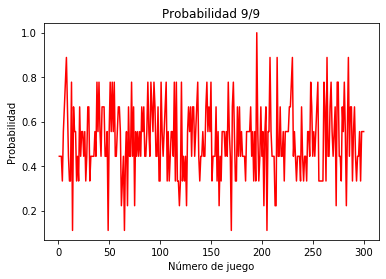

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

print("Por cada juego son 10 intentos y las bolitas van a ser suficientes para obtener el premio si se gana entre el intento 1 al 9")
print("Se repitió cada juego m=300 veces para encontrar algun patrón que se pueda analizar.")
print("Al ver que en todas los juegos se ganaba porlomenos 1 vez, se calculó la probabilidad ganar las 9 veces por juego.")
print("Esta probabilidad de graficó, siendo el eje Y la probabilidad y el eje X solamente el numero de juego.")
print("A continuación se presentan los juegos separados por una raya --- con cada uno de los resultados por intento.")
print("Luego se presentan las probabilidades de cada juego.")
print("Finalmente se presenta el gráfico.")
print("Por lo que se puede concluir que sí son suficientes bolitas para ganar el premio antes de los 10 intentos.")

random.seed(1)
L_prob=[]
m=301
for l in range(1,m):
    print("--------------------------")
    i=0
    for l in range(1,10):
        l_respuesta = []
        for n in range(1,8):
            uno = random.randint(1,4)
            dos = random.randint(1,2)
            tres = random.randint(1,2)
            cuatro = random.randint(1,2)
            cinco = random.randint(1,2)
            if (uno == 1):
                if(dos == 1):
                    tres = 2
                    if(cuatro == 1):
                        cinco = 2
                        respuesta = 1
                    elif(cuatro == 2):
                        if(cinco == 1):
                            respuesta = 1
                        elif(cinco == 2):
                            respuesta = 2
                elif(dos == 2):
                    if(tres == 1):
                        if(cuatro == 1):
                            cinco = 2
                            respuesta = 1
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3

            elif (uno == 2):
                if(dos == 1):
                    if(tres == 1):
                        if(cuatro == 1):
                            cinco = 2
                            respuesta = 1
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                elif(dos == 2):
                    if(tres == 1):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 3
                            elif(cinco == 2):
                                respuesta = 4

            elif (uno == 3):
                if(dos == 1):
                    if(tres == 1):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 3
                            elif(cinco == 2):
                                respuesta = 4
                elif(dos == 2):
                    if(tres == 1):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 3
                            elif(cinco == 2):
                                respuesta = 4
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 3
                            elif(cinco == 2):
                                respuesta = 4
                        elif(cuatro == 2):
                            cinco = 1
                            respuesta = 4
                            
            elif (uno == 4):
                if(dos == 2):
                    tres = 1
                    if(cuatro == 2):
                        cinco = 1
                        respuesta = 4
                    elif(cuatro == 1):
                        if(cinco == 2):
                            respuesta = 4
                        elif(cinco == 1):
                            respuesta = 3
                elif(dos == 1):
                    if(tres == 2):
                        if(cuatro == 2):
                            cinco = 1
                            respuesta = 4
                        elif(cuatro == 1):
                            if(cinco == 2):
                                respuesta = 4
                            elif(cinco == 1):
                                respuesta = 3
                    elif(tres == 1):
                        if(cuatro == 2):
                            if(cinco == 2):
                                respuesta = 4
                            elif(cinco == 1):
                                respuesta = 3
                        elif(cuatro == 1):
                            if(cinco == 2):
                                respuesta = 3
                            elif(cinco == 1):
                                respuesta = 2

            l_respuesta.append(respuesta)
        
        if(1 in l_respuesta and 2 in l_respuesta and 3 in l_respuesta and 4 in l_respuesta):
            i+=1
            print (l_respuesta,"si")
        else:
            print (l_respuesta)
    L_prob.append(i/9)
print (L_prob)

plt.plot(range(1,m),L_prob,color="red")
plt.title("Probabilidad 9/9")
plt.xlabel("Número de juego")
plt.ylabel("Probabilidad")
plt.show()


> b) Para $4 \leq n \leq 100$ calcule la probabilidad de ganar el juego al menos 1 vez en función de $n$ bolas. Presente el resultado en un gráfico de Probabilidad v/s $n$.

No basta 1 simulación para cada $n$

[0.1, 0.4, 0.4, 0.6, 0.6, 0.5, 1.0, 0.9, 0.7, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


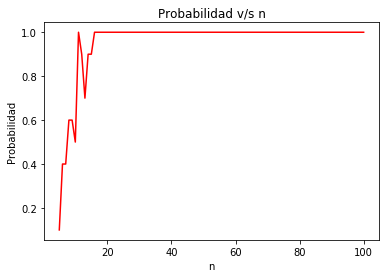

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

cantSimulacion=11
random.seed(1)
L_prob=[]
for m in range(5,101):
    i=0
    for l in range(1,cantSimulacion):
        l_respuesta = []
        for n in range(1,m):
            uno = random.randint(1,4)
            dos = random.randint(1,2)
            tres = random.randint(1,2)
            cuatro = random.randint(1,2)
            cinco = random.randint(1,2)
            if (uno == 1):
                if(dos == 1):
                    tres = 2
                    if(cuatro == 1):
                        cinco = 2
                        respuesta = 1
                    elif(cuatro == 2):
                        if(cinco == 1):
                            respuesta = 1
                        elif(cinco == 2):
                            respuesta = 2
                elif(dos == 2):
                    if(tres == 1):
                        if(cuatro == 1):
                            cinco = 2
                            respuesta = 1
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3

            elif (uno == 2):
                if(dos == 1):
                    if(tres == 1):
                        if(cuatro == 1):
                            cinco = 2
                            respuesta = 1
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                elif(dos == 2):
                    if(tres == 1):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 3
                            elif(cinco == 2):
                                respuesta = 4

            elif (uno == 3):
                if(dos == 1):
                    if(tres == 1):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 1
                            elif(cinco == 2):
                                respuesta = 2
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 3
                            elif(cinco == 2):
                                respuesta = 4
                elif(dos == 2):
                    if(tres == 1):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                        elif(cuatro == 2):
                            if(cinco == 1):
                                respuesta = 3
                            elif(cinco == 2):
                                respuesta = 4
                    elif(tres == 2):
                        if(cuatro == 1):
                            if(cinco == 1):
                                respuesta = 3
                            elif(cinco == 2):
                                respuesta = 4
                        elif(cuatro == 2):
                            cinco = 1
                            respuesta = 4
                            
            elif (uno == 4):
                if(dos == 2):
                    tres = 1
                    if(cuatro == 2):
                        cinco = 1
                        respuesta = 4
                    elif(cuatro == 1):
                        if(cinco == 2):
                            respuesta = 4
                        elif(cinco == 1):
                            respuesta = 3
                elif(dos == 1):
                    if(tres == 2):
                        if(cuatro == 2):
                            cinco = 1
                            respuesta = 4
                        elif(cuatro == 1):
                            if(cinco == 2):
                                respuesta = 4
                            elif(cinco == 1):
                                respuesta = 3
                    elif(tres == 1):
                        if(cuatro == 2):
                            if(cinco == 2):
                                respuesta = 4
                            elif(cinco == 1):
                                respuesta = 3
                        elif(cuatro == 1):
                            if(cinco == 2):
                                respuesta = 3
                            elif(cinco == 1):
                                respuesta = 2

            l_respuesta.append(respuesta)
        if(1 in l_respuesta and 2 in l_respuesta and 3 in l_respuesta and 4 in l_respuesta):
            i+=1
    L_prob.append(i/(cantSimulacion-1))
print (L_prob)

plt.plot(range(5,101),L_prob,color="red")
plt.title("Probabilidad v/s n")
plt.xlabel("n")
plt.ylabel("Probabilidad")
plt.show()

>c) Si a usted le queda 1 bola restante y solamente le falta cubrir la zona 3 determine la zona inicial a la que deberá apuntar el tiro para maximizar la probabilidad de ganar. 

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

print("Al 'colar' las respuestas posibles y solo dejar las que contienen la zona 3 dentro de 100 intentos")
print("Se puede concluir que existe una mayor probabilidad que caiga en la zona 3 si se pone la bola en la zona inicial C")
random.seed(1)

l_respuesta1 = []
l_respuesta2 = []
l_respuesta3 = []
l_respuesta4 = []
i1=0
i2=0
i3=0
i4=0
for n in range(1,101):
    dos = random.randint(1,2)
    tres = random.randint(1,2)
    cuatro = random.randint(1,2)
    cinco = random.randint(1,2)
    if(dos == 1):
        tres = 2
        if(cuatro == 1):
            cinco = 2
            respuesta = 1
        elif(cuatro == 2):
            if(cinco == 1):
                respuesta = 1
            elif(cinco == 2):
                respuesta = 2
    elif(dos == 2):
        if(tres == 1):
            if(cuatro == 1):
                cinco = 2
                respuesta = 1
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 1
                elif(cinco == 2):
                    respuesta = 2
        elif(tres == 2):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 1
                elif(cinco == 2):
                    respuesta = 2
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
    if(respuesta == 3):
        l_respuesta1.append(respuesta)
        i1+=1
print (l_respuesta1)
                    
for n in range(1,101):  
    dos = random.randint(1,2)
    tres = random.randint(1,2)
    cuatro = random.randint(1,2)
    cinco = random.randint(1,2)
    if(dos == 1):
        if(tres == 1):
            if(cuatro == 1):
                cinco = 2
                respuesta = 1
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 1
                elif(cinco == 2):
                    respuesta = 2
        elif(tres == 2):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 1
                elif(cinco == 2):
                    respuesta = 2
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
    elif(dos == 2):
        if(tres == 1):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 1
                elif(cinco == 2):
                    respuesta = 2
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
        elif(tres == 2):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 3
                elif(cinco == 2):
                    respuesta = 4
    if(respuesta == 3):
        l_respuesta2.append(respuesta)
        i2+=1
print (l_respuesta2)  

for n in range(1,101):  
    dos = random.randint(1,2)
    tres = random.randint(1,2)
    cuatro = random.randint(1,2)
    cinco = random.randint(1,2)
    if(dos == 1):
        if(tres == 1):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 1
                elif(cinco == 2):
                    respuesta = 2
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
        elif(tres == 2):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 3
                elif(cinco == 2):
                    respuesta = 4
    elif(dos == 2):
        if(tres == 1):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 3
                elif(cinco == 2):
                    respuesta = 4
        elif(tres == 2):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 3
                elif(cinco == 2):
                    respuesta = 4
            elif(cuatro == 2):
                cinco = 1
                respuesta = 4
    if(respuesta == 3):
        l_respuesta3.append(respuesta)
        i3+=1
print (l_respuesta3)  

for n in range(1,101):
    dos = random.randint(1,2)
    tres = random.randint(1,2)
    cuatro = random.randint(1,2)
    cinco = random.randint(1,2)
    if(dos == 2):
        tres = 1
        if(cuatro == 2):
            cinco = 1
            respuesta = 4
        elif(cuatro == 1):
            if(cinco == 2):
                respuesta = 4
            elif(cinco == 1):
                respuesta = 3
    elif(dos == 1):
        if(tres == 2):
            if(cuatro == 2):
                cinco = 1
                respuesta = 4
            elif(cuatro == 1):
                if(cinco == 2):
                    respuesta = 4
                elif(cinco == 1):
                    respuesta = 3
        elif(tres == 1):
            if(cuatro == 2):
                if(cinco == 2):
                    respuesta = 4
                elif(cinco == 1):
                    respuesta = 3
            elif(cuatro == 1):
                if(cinco == 2):
                    respuesta = 3
                elif(cinco == 1):
                    respuesta = 2
    if(respuesta == 3):
        l_respuesta4.append(respuesta)
        i4+=1
print (l_respuesta4)  

Lfinal = [i1/100,i2/100,i3/100,i4/100]
print ("Probabilidad de A: ",Lfinal[0])
print ("Probabilidad de B: ",Lfinal[1])
print ("Probabilidad de C: ",Lfinal[2])
print ("Probabilidad de D: ",Lfinal[3])


Al 'colar' las respuestas posibles y solo dejar las que contienen la zona 3 dentro de 100 intentos
Se puede concluir que existe una mayor probabilidad que caiga en la zona 3 si se pone la bola en la zona inicial C
[3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Probabilidad de A:  0.06
Probabilidad de B:  0.3
Probabilidad de C:  0.39
Probabilidad de D:  0.3


>d) Determine la probabilidad de alcanzar cada zona final si la bola llega inicialmente a "A". Repita el procedimiento pero esta vez utilizando "C" como punto de partida.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(1)


l_respuestaA = []
l_respuestaC = []
for n in range(1,101):
    dos = random.randint(1,2)
    tres = random.randint(1,2)
    cuatro = random.randint(1,2)
    cinco = random.randint(1,2)
    if(dos == 1):
        tres = 2
        if(cuatro == 1):
            cinco = 2
            respuesta = 1
        elif(cuatro == 2):
            if(cinco == 1):
                respuesta = 1
            elif(cinco == 2):
                respuesta = 2
    elif(dos == 2):
        if(tres == 1):
            if(cuatro == 1):
                cinco = 2
                respuesta = 1
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 1
                elif(cinco == 2):
                    respuesta = 2
        elif(tres == 2):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 1
                elif(cinco == 2):
                    respuesta = 2
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
    
    l_respuestaA.append(respuesta)

for n in range(1,101):  
    dos = random.randint(1,2)
    tres = random.randint(1,2)
    cuatro = random.randint(1,2)
    cinco = random.randint(1,2)
    if(dos == 1):
        if(tres == 1):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 1
                elif(cinco == 2):
                    respuesta = 2
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
        elif(tres == 2):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 3
                elif(cinco == 2):
                    respuesta = 4
    elif(dos == 2):
        if(tres == 1):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 2
                elif(cinco == 2):
                    respuesta = 3
            elif(cuatro == 2):
                if(cinco == 1):
                    respuesta = 3
                elif(cinco == 2):
                    respuesta = 4
        elif(tres == 2):
            if(cuatro == 1):
                if(cinco == 1):
                    respuesta = 3
                elif(cinco == 2):
                    respuesta = 4
            elif(cuatro == 2):
                cinco = 1
                respuesta = 4
    l_respuestaC.append(respuesta)

print("La probabilidad de 1 desde A: ",(l_respuestaA.count(1)/100))
print("La probabilidad de 2 desde A: ",(l_respuestaA.count(2)/100))
print("La probabilidad de 3 desde A: ",(l_respuestaA.count(3)/100))
print("La probabilidad de 4 desde A: ",(l_respuestaA.count(4)/100))

print("\nLa probabilidad de 1 desde C: ",(l_respuestaC.count(1)/100))
print("La probabilidad de 2 desde C: ",(l_respuestaC.count(2)/100))
print("La probabilidad de 3 desde C: ",(l_respuestaC.count(3)/100))
print("La probabilidad de 4 desde C: ",(l_respuestaC.count(4)/100))

La probabilidad de 1 desde A:  0.67
La probabilidad de 2 desde A:  0.27
La probabilidad de 3 desde A:  0.06
La probabilidad de 4 desde A:  0.0

La probabilidad de 1 desde C:  0.07
La probabilidad de 2 desde C:  0.22
La probabilidad de 3 desde C:  0.34
La probabilidad de 4 desde C:  0.37


>e) Si ahora la bola tiene un 70% de probabilidad de mantener la dirección actual y un 30% de cambiar de dirección ¿Mantiene la respuesta dada en a)?

En la zona inicial (A,B,C,D) tiene la misma probabilidad de irse tanto a la izquierda como a la derecha, pero en las siguientes zonas si la bolita fue a la izquierda tiene un 70% de irse a la izquierda y un 30% de irse a la derecha, si después se va a la derecha tiene un 70% de probabilidad de irse a la derecha y así sucesivamente.

--------------------------
[2, 4, 2, 3, 1, 2, 4] si
[1, 2, 1, 4, 2, 2, 2]
[4, 3, 4, 2, 3, 2, 1] si
[4, 1, 1, 3, 1, 2, 3] si
[2, 4, 2, 4, 2, 3, 2]
[3, 1, 4, 3, 2, 3, 4] si
[4, 2, 4, 1, 1, 4, 3] si
[4, 4, 1, 1, 4, 2, 3] si
[2, 3, 4, 4, 3, 4, 2]
--------------------------
[4, 4, 2, 4, 4, 1, 2]
[1, 1, 1, 3, 2, 4, 4] si
[1, 1, 3, 3, 1, 3, 3]
[2, 1, 1, 4, 4, 2, 2]
[2, 1, 4, 4, 4, 1, 4]
[1, 1, 3, 2, 2, 2, 2]
[2, 4, 2, 2, 2, 2, 4]
[4, 4, 2, 3, 4, 2, 3]
[2, 3, 2, 1, 2, 1, 4] si
--------------------------
[3, 1, 2, 2, 1, 4, 3] si
[3, 3, 3, 1, 4, 2, 4] si
[2, 4, 1, 4, 4, 2, 3] si
[2, 2, 1, 2, 4, 1, 4]
[4, 4, 2, 3, 1, 1, 1] si
[2, 3, 3, 2, 2, 2, 1]
[4, 4, 1, 3, 3, 4, 4]
[2, 3, 3, 1, 1, 4, 2] si
[1, 1, 1, 1, 2, 1, 4]
--------------------------
[1, 1, 2, 3, 2, 4, 4] si
[4, 4, 1, 4, 2, 4, 3] si
[3, 1, 4, 4, 3, 1, 2] si
[1, 3, 3, 4, 3, 3, 3]
[4, 3, 2, 1, 1, 1, 2] si
[3, 3, 3, 4, 1, 4, 3]
[1, 3, 4, 4, 1, 1, 2] si
[2, 2, 4, 1, 2, 3, 3] si
[2, 1, 3, 1, 2, 2, 4] si
--------------------------
[4, 4, 1, 2, 

[4, 1, 2, 3, 2, 1, 2] si
--------------------------
[4, 3, 1, 2, 2, 2, 2] si
[3, 3, 4, 4, 1, 2, 2] si
[2, 2, 3, 2, 1, 1, 1]
[3, 4, 4, 3, 3, 4, 2]
[1, 1, 3, 2, 2, 3, 4] si
[2, 1, 1, 3, 2, 2, 4] si
[1, 4, 4, 3, 1, 3, 1]
[1, 3, 1, 1, 2, 4, 1] si
[3, 2, 2, 2, 2, 2, 1]
--------------------------
[2, 2, 4, 4, 4, 2, 2]
[4, 3, 2, 2, 2, 3, 1] si
[2, 2, 4, 3, 4, 4, 2]
[2, 2, 4, 4, 3, 2, 2]
[3, 4, 2, 3, 3, 1, 4] si
[1, 1, 3, 2, 4, 2, 2] si
[2, 2, 2, 4, 1, 2, 3] si
[2, 1, 2, 1, 4, 2, 3] si
[2, 2, 3, 1, 4, 4, 4] si
--------------------------
[3, 4, 4, 2, 1, 2, 2] si
[4, 4, 1, 1, 4, 2, 1]
[2, 1, 3, 1, 2, 1, 1]
[1, 2, 4, 3, 4, 1, 2] si
[2, 1, 3, 1, 1, 4, 4] si
[3, 4, 4, 2, 2, 4, 2]
[4, 2, 3, 2, 4, 3, 2]
[2, 4, 2, 1, 4, 2, 3] si
[2, 3, 4, 3, 3, 2, 1] si
--------------------------
[4, 1, 1, 3, 4, 4, 3]
[1, 3, 3, 2, 1, 4, 1] si
[2, 1, 2, 2, 3, 3, 2]
[2, 1, 2, 1, 1, 1, 2]
[4, 2, 3, 4, 3, 1, 1] si
[4, 1, 1, 3, 3, 1, 1]
[3, 1, 1, 2, 1, 1, 3]
[2, 2, 1, 1, 4, 1, 2]
[2, 2, 3, 4, 4, 4, 1] si
------------------

[2, 3, 4, 1, 3, 1, 3] si
--------------------------
[4, 2, 3, 3, 3, 4, 1] si
[2, 3, 1, 2, 3, 1, 1]
[1, 2, 2, 3, 2, 1, 1]
[2, 2, 1, 1, 4, 4, 4]
[4, 3, 1, 3, 2, 3, 2] si
[3, 2, 4, 1, 3, 2, 2] si
[1, 2, 2, 1, 1, 4, 1]
[4, 2, 1, 2, 4, 1, 1]
[3, 2, 4, 1, 1, 1, 4] si
--------------------------
[1, 1, 4, 2, 1, 2, 2]
[1, 4, 2, 1, 3, 1, 2] si
[2, 1, 3, 3, 1, 4, 1] si
[1, 3, 1, 1, 2, 1, 3]
[4, 1, 2, 3, 4, 2, 4] si
[4, 2, 3, 4, 2, 1, 1] si
[1, 2, 1, 2, 4, 2, 3] si
[4, 4, 1, 3, 2, 3, 2] si
[4, 3, 4, 1, 2, 2, 2] si
--------------------------
[3, 1, 3, 1, 3, 4, 4]
[3, 3, 2, 2, 4, 3, 3]
[4, 4, 1, 2, 4, 1, 2]
[2, 3, 2, 2, 4, 1, 4] si
[1, 4, 1, 4, 4, 2, 4]
[4, 4, 4, 3, 2, 2, 2]
[3, 4, 2, 4, 4, 3, 1] si
[4, 3, 3, 1, 4, 2, 4] si
[4, 4, 3, 3, 4, 4, 4]
--------------------------
[1, 1, 3, 4, 2, 4, 4] si
[3, 1, 2, 2, 1, 4, 1] si
[2, 1, 2, 2, 4, 1, 4]
[4, 2, 4, 3, 3, 1, 4] si
[4, 2, 4, 4, 3, 2, 3]
[2, 2, 2, 2, 3, 1, 2]
[1, 4, 2, 4, 2, 1, 1]
[1, 2, 2, 1, 2, 1, 2]
[2, 2, 1, 1, 3, 2, 1]
------------------------

[4, 1, 4, 4, 2, 3, 3] si
[1, 1, 4, 3, 4, 3, 1]
[4, 3, 1, 4, 1, 1, 1]
[3, 4, 3, 4, 1, 1, 4]
[4, 4, 3, 2, 4, 2, 4]
[2, 1, 1, 2, 3, 2, 2]
[2, 3, 2, 4, 1, 4, 1] si
[3, 3, 4, 1, 2, 2, 1] si
--------------------------
[2, 2, 1, 1, 4, 2, 1]
[3, 3, 1, 3, 3, 4, 2] si
[3, 1, 3, 3, 1, 4, 2] si
[2, 3, 3, 3, 1, 3, 4] si
[1, 3, 4, 2, 2, 2, 2] si
[3, 1, 2, 2, 4, 2, 2] si
[1, 4, 4, 1, 2, 4, 4]
[1, 4, 3, 4, 3, 4, 2] si
[2, 4, 2, 2, 1, 2, 1]
--------------------------
[3, 3, 2, 4, 1, 2, 1] si
[4, 2, 1, 3, 3, 1, 3] si
[3, 1, 4, 4, 4, 1, 3]
[1, 3, 2, 3, 3, 1, 1]
[4, 1, 4, 1, 2, 3, 3] si
[3, 1, 2, 1, 2, 3, 4] si
[4, 2, 4, 4, 4, 2, 4]
[4, 3, 3, 4, 1, 1, 4]
[2, 4, 1, 2, 3, 3, 3] si
--------------------------
[2, 2, 2, 4, 4, 4, 4]
[3, 3, 1, 2, 2, 1, 1]
[2, 1, 2, 3, 4, 3, 4] si
[2, 2, 2, 2, 4, 1, 3] si
[3, 3, 1, 4, 1, 3, 4]
[2, 3, 3, 4, 2, 4, 2]
[3, 2, 2, 2, 2, 3, 4]
[4, 3, 2, 3, 2, 4, 3]
[4, 2, 1, 2, 2, 4, 1]
--------------------------
[2, 3, 4, 3, 3, 4, 3]
[1, 4, 1, 3, 3, 4, 1]
[1, 2, 3, 4, 3, 1, 1] si
[2, 1

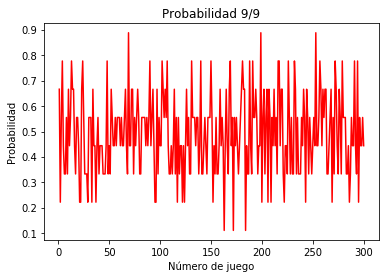

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

print("Al comprara los gráfico se ve una tendencia más pronunciada hacia un valor central [0.4,0.6] .")
print("Al igual que en a) en todos los juegos se ganaba porlomenos 1 vez.")
print("Por lo que se mantiene la respuesta dada en a)")

L_prob=[]
random.seed(1)
for l in range(1,301):
    print("--------------------------")
    i=0
    for m in range(1,10):
        l_respuesta = []
        for n in range(1,8):
            uno = random.randint(1,4)
            dos = random.randint(1,2)
            tres = random.randint(1,10)
            cuatro = random.randint(1,10)
            cinco = random.randint(1,10)
            if (uno == 1):
                if(dos == 1):
                    tres = 10
                    if(cuatro <= 3):
                        cinco = 10
                        respuesta = 1
                    elif(cuatro > 3):
                        if(cinco <= 3):
                            respuesta = 1
                        elif(cinco > 3):
                            respuesta = 2
                elif(dos == 2):
                    if(tres <= 3):
                        if(cuatro > 3):
                            cinco = 10
                            respuesta = 1
                        elif(cuatro <= 3):
                            if(cinco <= 3):
                                respuesta = 1
                            elif(cinco > 3):
                                respuesta = 2
                    elif(tres > 3):
                        if(cuatro <= 3):
                            if(cinco > 3):
                                respuesta = 1
                            elif(cinco <= 3):
                                respuesta = 2
                        elif(cuatro > 3):
                            if(cinco <= 3):
                                respuesta = 2
                            elif(cinco > 3):
                                respuesta = 3

            elif (uno == 2):
                if(dos == 1):
                    if(tres > 3):
                        if(cuatro > 3):
                            cinco = 10
                            respuesta = 1
                        elif(cuatro <= 3):
                            if(cinco <= 3):
                                respuesta = 1
                            elif(cinco > 3):
                                respuesta = 2
                    elif(tres <= 3):
                        if(cuatro <= 3):
                            if(cinco > 3):
                                respuesta = 1
                            elif(cinco <= 3):
                                respuesta = 2
                        elif(cuatro > 3):
                            if(cinco <= 3):
                                respuesta = 2
                            elif(cinco > 3):
                                respuesta = 3
                elif(dos == 2):
                    if(tres <= 3):
                        if(cuatro > 3):
                            if(cinco > 3):
                                respuesta = 1
                            elif(cinco <= 3):
                                respuesta = 2
                        elif(cuatro <= 3):
                            if(cinco <= 3):
                                respuesta = 2
                            elif(cinco > 3):
                                respuesta = 3
                    elif(tres > 3):
                        if(cuatro <= 3):
                            if(cinco > 3):
                                respuesta = 2
                            elif(cinco <= 3):
                                respuesta = 3
                        elif(cuatro > 3):
                            if(cinco <= 3):
                                respuesta = 3
                            elif(cinco > 3):
                                respuesta = 4

            elif (uno == 3):
                if(dos == 1):
                    if(tres > 3):
                        if(cuatro > 3):
                            if(cinco > 3):
                                respuesta = 1
                            elif(cinco <= 3):
                                respuesta = 2
                        elif(cuatro <= 3):
                            if(cinco == 1):
                                respuesta = 2
                            elif(cinco == 2):
                                respuesta = 3
                    elif(tres <= 3):
                        if(cuatro <= 3):
                            if(cinco > 3):
                                respuesta = 2
                            elif(cinco <= 3):
                                respuesta = 3
                        elif(cuatro > 3):
                            if(cinco <= 3):
                                respuesta = 3
                            elif(cinco > 3):
                                respuesta = 4
                elif(dos == 2):
                    if(tres <= 3):
                        if(cuatro > 3):
                            if(cinco > 3):
                                respuesta = 2
                            elif(cinco <= 3):
                                respuesta = 3
                        elif(cuatro <= 3):
                            if(cinco <= 3):
                                respuesta = 3
                            elif(cinco > 3):
                                respuesta = 4
                    elif(tres > 3):
                        if(cuatro <= 3):
                            if(cinco == 1):
                                respuesta = 3
                            elif(cinco == 2):
                                respuesta = 4
                        elif(cuatro > 3):
                            cinco = 1
                            respuesta = 4
                            
            elif (uno == 4):
                if(dos == 2):
                    tres = 1
                    if(cuatro <= 3):
                        cinco = 1
                        respuesta = 4
                    elif(cuatro > 3):
                        if(cinco <= 3):
                            respuesta = 4
                        elif(cinco > 3):
                            respuesta = 3
                elif(dos == 1):
                    if(tres <= 3):
                        if(cuatro > 3):
                            cinco = 1
                            respuesta = 4
                        elif(cuatro <= 3):
                            if(cinco <= 3):
                                respuesta = 4
                            elif(cinco > 3):
                                respuesta = 3
                    elif(tres > 3):
                        if(cuatro <= 3):
                            if(cinco > 3):
                                respuesta = 4
                            elif(cinco <= 3):
                                respuesta = 3
                        elif(cuatro > 3):
                            if(cinco <= 3):
                                respuesta = 3
                            elif(cinco > 3):
                                respuesta = 2

            l_respuesta.append(respuesta)
        if(1 in l_respuesta and 2 in l_respuesta and 3 in l_respuesta and 4 in l_respuesta):
            print (l_respuesta,"si")
            i+=1
        else:
            print (l_respuesta)
    L_prob.append(i/9)
            
plt.plot(range(1,301),L_prob,color="red")
plt.title("Probabilidad 9/9")
plt.xlabel("Número de juego")
plt.ylabel("Probabilidad")
plt.show()




## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Las dudas deberán ser publicadas en moodle para que sus compañeros puedan beneficiarse de la respuesta, no se aceptarán dudas vía correo ni redes sociales, esto es para fomentar que todos tengan la misma información.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)